# Assignment Python 1 - Publication-Grade Plot

**Nama: Shendy Krisyohanda**  
**Kode Peserta: PYTN-KS08-21**  
***MSIB Batch 3***

## Exploring Datasets with pandas and Matplotlib

### The Dataset: London Crime Data from 2008 to 2016

Toolkit: Section ini sangat bergantung pada pandas dan Numpy untuk data wrangling, analysis, dan visualization. 

Dataset Source: <a href="https://www.kaggle.com/datasets/jboysen/london-crime ">London Crime Data, 2008-2016</a>

Kejahatan di wilayah metropolitan utama, seperti London, terjadi dalam pola yang berbeda. Data ini mencakup jumlah laporan kriminal menurut bulan, wilayah LSOA, dan kategori mayor/minor dari Jan 2008-Des 2016.

## Prepping Data

Import Pustaka yang dibutuhkan:

In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import folium

Mengambil dataset di folder dataset london crime.

In [3]:
df = pd.read_csv("dataset/london_crime_by_lsoa.csv")

Mengetahui jumlah baris dan kolom pada dataset menggunakan fungsi `shape()`.

In [4]:
df.shape

(13490604, 7)

DataFrame mempunyai **13.490.604 baris** dan **7 kolom**, mencakup periode dari Januari 2008-Desember 2016.

Menampilkan 5 baris data pertama menggunakan fungsi `head()`.

In [5]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


Menampilkan 5 baris data terakhir menggunakan fungsi `tail()`.

In [6]:
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


Pada saat menganalisis dataset, mendapatkan informasi dasar tentang dataset merupakan ide yang baik. Gunakan metode `info` untuk menampilkan semua kolom dengan tipe datanya.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Pada dataset terdapat tipe data int64 dan object.

Melihat/memeriksa jumlah total missing values untuk setiap fitur menggunakan `isnull().sum()`:

In [8]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Ringkasan singkat setiap kolom menggunakan fungsi `describe()`.

In [9]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


Memeriksa seberapa sering nilai itu muncul pada tiap kolom dapat menggunakan `value_counts()`.

In [10]:
df['borough'].value_counts()

Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

Pada kolom borough nilai yang paling sering muncul adalah **Croydon** sebanyak *602.100* kali.

In [11]:
df['major_category'].value_counts()

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

Pada kolom major_category nilai yang paling sering muncul adalah **Theft and Handling** sebanyak *3.966.300* kali.

In [12]:
df['minor_category'].value_counts()

Common Assault                            522180
Theft From Motor Vehicle                  522180
Other Theft                               522180
Burglary in Other Buildings               522072
Theft/Taking Of Motor Vehicle             522072
Harassment                                522072
Criminal Damage To Motor Vehicle          521964
Assault with Injury                       521856
Other Criminal Damage                     521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

Pada kolom minor_category terdapat 3 buah nilai yang sering muncul yakni **Common Assault**, **Theft From Motor Vehicle**, dan **Other Theft**.

Untuk mengetahui jumlah nilai berbeda pada tiap kolom dapat menggunakan fungsi `nunique()`.

In [13]:
df['borough'].nunique()

33

Pada kolom `borough` terdapat **33** jenis nilai yang berbeda.

In [14]:
df['major_category'].nunique()

9

Terdapat **9** jenis kejahatan mayor.

In [15]:
df['minor_category'].nunique()

32

Pada kategori minor terdapat **32** jenis.

Bersihkan dataset dengan menghapus kolom `lsoa_code` karena kolom tersebut tidak diperlukan. Cara menghapus kolomnya dengan menggunakan fungsi `drop()`.

In [16]:
df.drop(['lsoa_code'], axis=1, inplace=True)

Memeriksa data menggunakan `df.columns` untuk memastikan kolom `lsoa_code` terhapus.

In [17]:
df.columns

Index(['borough', 'major_category', 'minor_category', 'value', 'year',
       'month'],
      dtype='object')

Kolom `lsoa_code` telah terhapus setelah menggunakan fungsi `drop()`.

## Data Visualization

### Area Plot

#### Pertanyaan: `Apa 3 kejahatan kategori mayor teratas di London selama periode 2008-2016?`

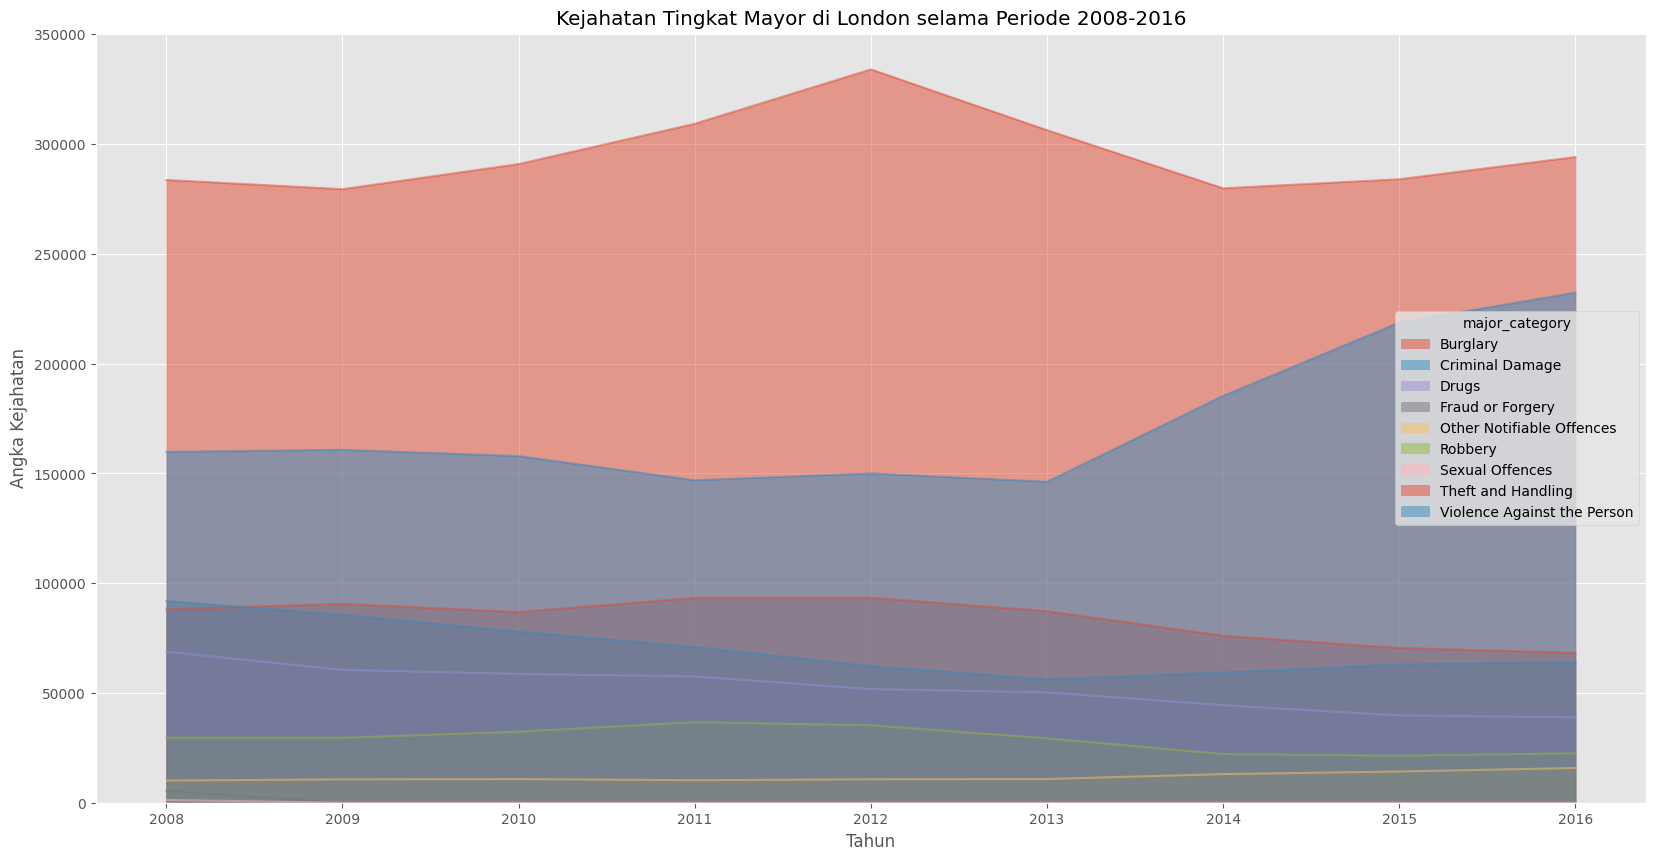

In [18]:
mpl.style.use(['ggplot']) #style
crimeMajorCategoryInYears = df.groupby(['year', 'major_category']).sum()['value'].reset_index()

crimeMajorCategoryInYears.pivot(index = 'year', columns='major_category', values='value').plot(kind='area', stacked = False, figsize=(20,10))
plt.title('Kejahatan Tingkat Mayor di London selama Periode 2008-2016')  
plt.ylabel('Angka Kejahatan') 
plt.xlabel('Tahun') 

plt.show()

Berdasarkan grafik, 3 kejahatan mayor teratas di London selama periode 2008-2016 adalah `Theft and Handling`, `Violence Against the Person`, dan `Burglary`. `Theft and Handling` selalu berada di peringkat teratas dengan kisaran di atas 250.000 kasus setiap tahunnya. Lalu, disusul oleh `Violence Against the Person` yang setiap tahunnya memiliki kasus di atas 100.000 dan pada tahun 2013 kejahatan ini mengalami peningkatan yang cukup signifikan hingga tahun-tahun berikutnya. Sedangkan untuk kejahatan yang lain kasus setiap tahunnya di bawah 100.000 dan cenderung stabil setiap tahunnya.  

### Histogram

#### Pertanyaan: `Berapa distribusi frekuensi kasus kejahatan di London dari berbagai wilayah pada periode 2008-2016?`

In [33]:
crimeBorough = df.groupby(['borough'], axis=0).sum()['value']
crimeBorough.head()

borough
Barking and Dagenham    149447
Barnet                  212191
Bexley                  114136
Brent                   227551
Bromley                 184349
Name: value, dtype: int64

In [34]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(crimeBorough)

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[ 1  1  5  4 13  5  3  0  0  1]
[   780.   46204.8  91629.6 137054.4 182479.2 227904.  273328.8 318753.6
 364178.4 409603.2 455028. ]


Secara default, metode histrogram memecah dataset menjadi 10 bin.

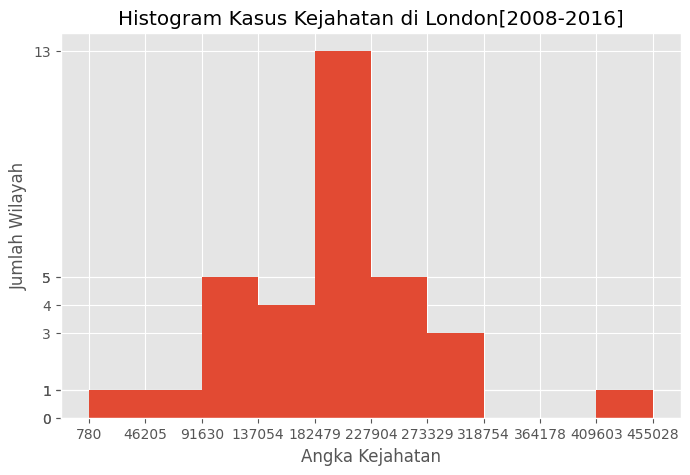

In [36]:
crimeBorough.plot(kind='hist', figsize=(8, 5), xticks=bin_edges, yticks=count)

plt.title('Histogram Kasus Kejahatan di London[2008-2016]') # add a title to the histogram
plt.ylabel('Jumlah Wilayah') # add y-label
plt.xlabel('Angka Kejahatan') # add x-label

plt.show()

Dari visualisasi histogram di atas maka dapat ditarik sebuah kesimpulan:
1. Ada **13** wilayah yang memiliki total kasus kejahatan antara ***182.479-227.904*** kasus
2. Ada **5** wilayah yang memiliki total kasus kejahatan antara ***91.630-137.054*** kasus
3. Ada **5** wilayah yang memiliki total kasus kejahatan antara ***227.904-273.329*** kasus
4. Ada **4** wilayah yang memiliki total kasus kejahatan antara ***137.054-182.479*** kasus
5. Ada **3** wilayah yang memiliki total kasus kejahatan antara ***273.329-318.754*** kasus
6. Ada **1** wilayah yang memiliki total kasus kejahatan antara ***780-46.205*** kasus
7. Ada **1** wilayah yang memiliki total kasus kejahatan antara ***46.205-91.630*** kasus
8. Ada **1** wilayah yang memiliki total kasus kejahatan antara ***409.603-455.028*** kasus

### Bar Chart

#### Pertanyaan: `Pada tahun berapa wilayah distrik Brent memiliki kasus kejahatan tingkat minor 'Assault with Injury' tertinggi?`

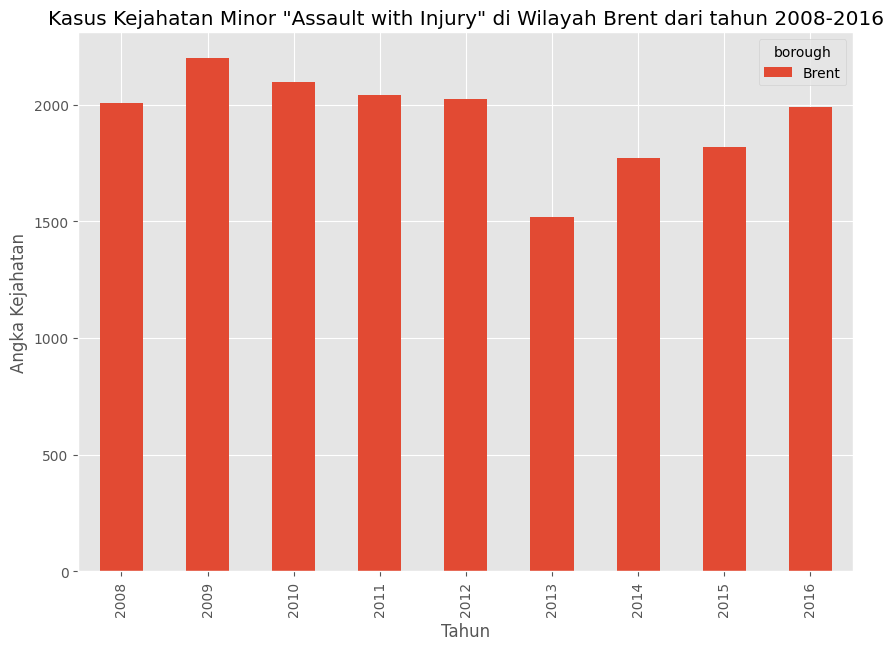

In [20]:
boroughMinorCrime = df.groupby(['borough', 'minor_category', 'year'], axis=0).sum()['value'].reset_index()
crimeBrent = boroughMinorCrime.loc[boroughMinorCrime['borough'].isin(['Brent'])]
crimeBrent.loc[boroughMinorCrime['minor_category'].isin(['Assault with Injury'])].pivot(index = 'year', columns='borough', values='value').plot(kind='bar',figsize=(10,7))

plt.title('Kasus Kejahatan Minor "Assault with Injury" di Wilayah Brent dari tahun 2008-2016')
plt.ylabel('Angka Kejahatan') 
plt.xlabel('Tahun')

plt.show()

Pada kasus kejahatan tingkat minor yakni `Assault with Injury` yang terjadi di wilayah Brent pada tahun 2008 sampai 2016, kasus kejahatan tertinggi terjadi pada tahun 2009 dan terendah tahun 2013.

#### Pertanyaan: `Dimana wilayah yang memiliki angka kejahatan tertinggi dan terendah di London?`

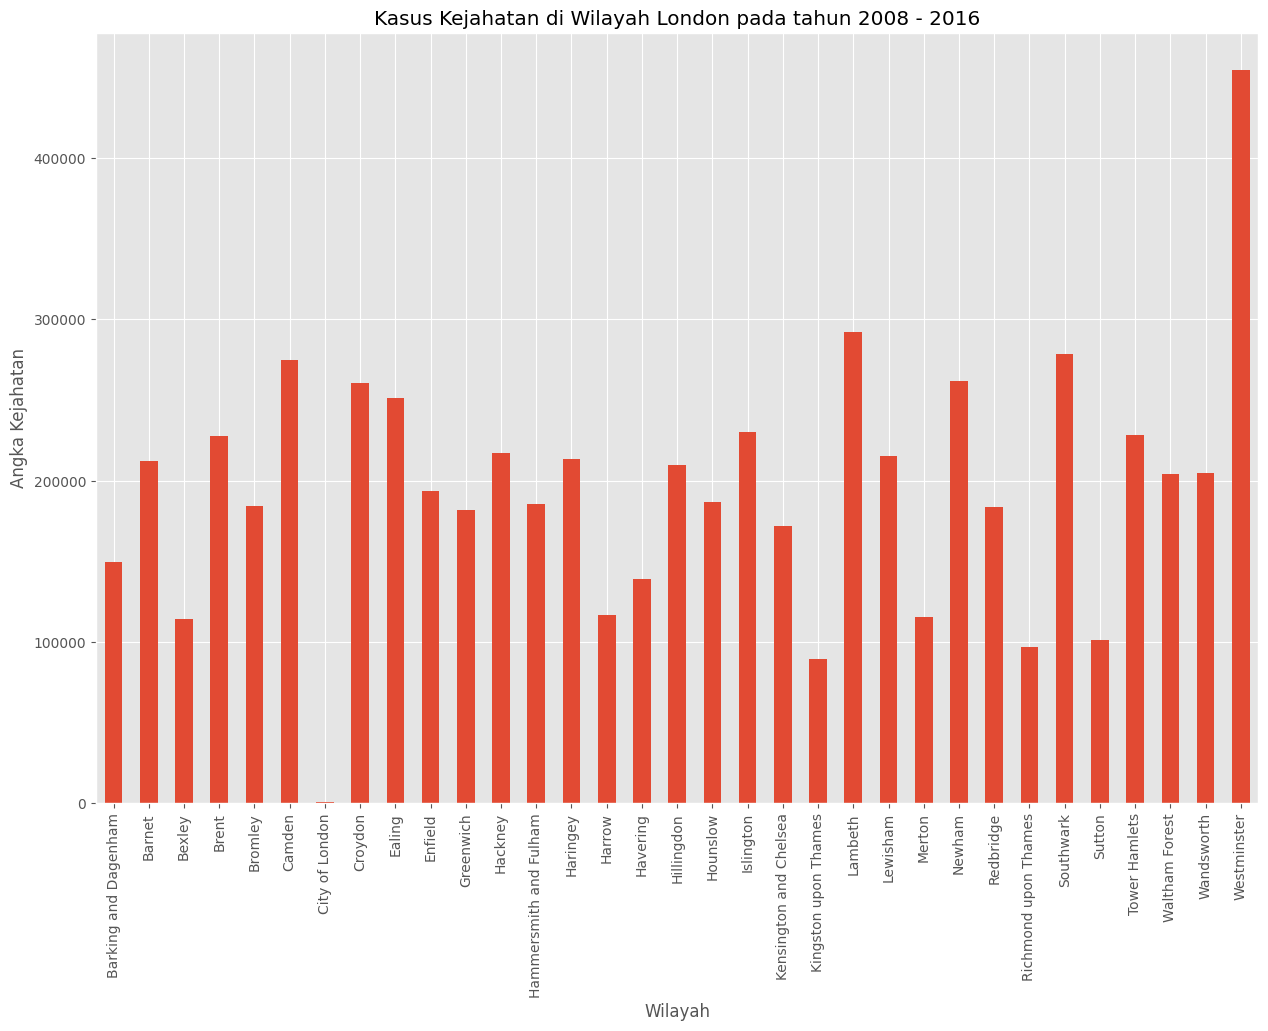

In [21]:
crimeBorough = df.groupby(['borough'], axis=0).sum()['value']
crimeBorough.plot(kind = 'bar', figsize=(15,10))

plt.title('Kasus Kejahatan di Wilayah London pada tahun 2008 - 2016')
plt.xlabel('Wilayah')
plt.ylabel('Angka Kejahatan')

plt.show()

Pada gambar grafik di atas terlihat total kasus kejahatan yang terjadi di wilayah London pada periode tahun 2008 sampai 2016. Wilayah **Westminster** memimpin dengan total kasus kejahatan di angka 400.000 kasus dan wilayah **City of London** memiliki kasus kejahatan paling sedikit. Sedangkan, pada wilayah lain kasus kejahatan yang terjadi rata-rata berada di angka 100.000 ke atas.

### Pie Chart

#### Pertanyaan: `Kategori kejahatan tingkat mayor apa yang paling sering terjadi di London?`

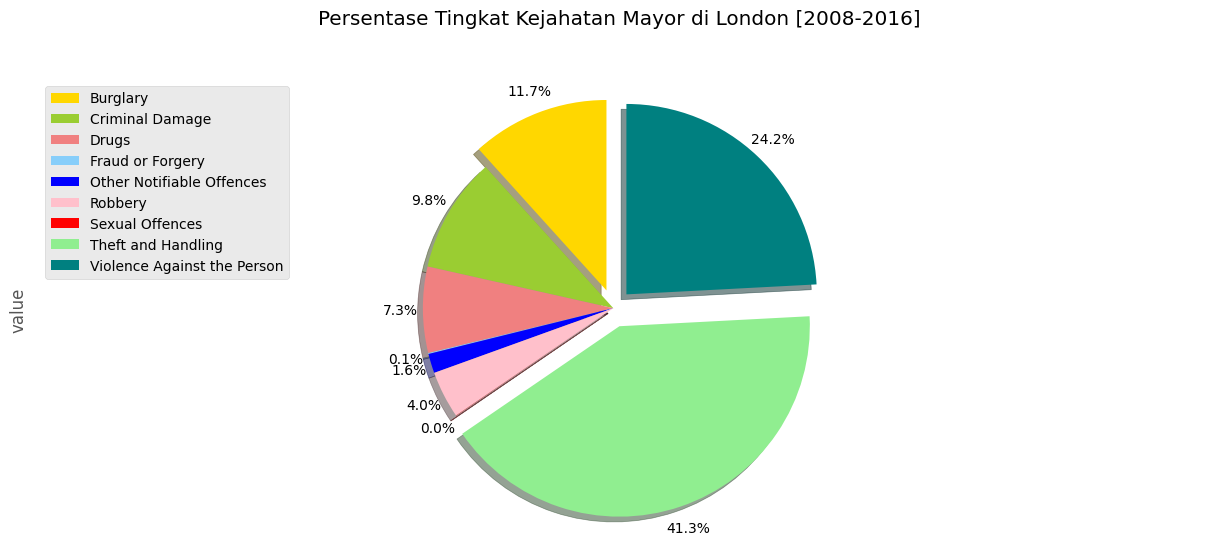

In [22]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'blue', 'pink', 'red', 'lightgreen', 'teal']
explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0.1, 0.1]

crimeMajorCategory = df.groupby("major_category", axis=0).sum()
crimeMajorCategory['value'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

plt.title('Persentase Tingkat Kejahatan Mayor di London [2008-2016]', y=1.1) 

plt.axis('equal') 

# add legend
plt.legend(labels=crimeMajorCategory.index, loc='upper left') 

plt.show()

Berdasarkan pie chart di atas, kasus kejahatan yang paling sering terjadi di London adalah `Theft and Handling` sebesar ***41.3%***, disusul oleh `Violence Against the Person` dengan persentase ***24.2%***, dan di urutan ketiga ada `Burglary` sebesar ***11.7%***.

### Box Plot

#### Pertanyaan: `Bagaimana distribusi data statistik wilayah City of London?`

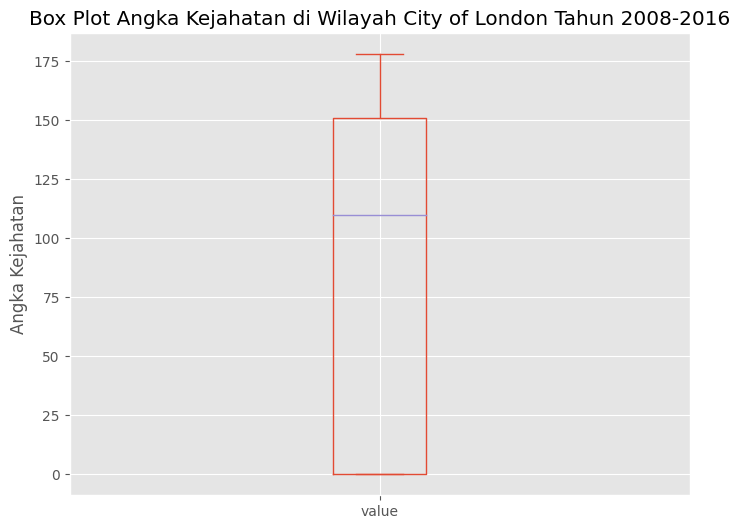

In [23]:
crimeBorough = df.groupby(['borough','year'], axis=0).sum()['value']
# boroughMinorCrime = df.groupby(['borough', 'minor_category', 'year'], axis=0).sum()['value'].reset_index()
crimeCoL = crimeBorough['City of London']

crimeCoL.plot(kind='box', figsize=(8, 6))

plt.title('Box Plot Angka Kejahatan di Wilayah City of London Tahun 2008-2016')
plt.ylabel('Angka Kejahatan')

plt.show()

Observasi penting setelah melihat box plot di atas:
1. Jumlah minimum angka kejahatan di City of London adalah 0, jumlah maksimum sekitar 180, dan jumlah median imigran sekitar 110.
2. 25% tahun untuk periode 2008 - 2016 memiliki angka kejahatan tahunan 0 (Kuartil pertama).
3. 75% tahun untuk periode 2008 - 2016 memiliki angka kejahatan tahunan 150 atau lebih (Kuartil ketiga).  

Kita dapat memastikan angka aktualnya menggunakan metode .`describe()`

In [27]:
crimeCoL.describe()

count      9.000000
mean      86.666667
std       72.128358
min        0.000000
25%        0.000000
50%      110.000000
75%      151.000000
max      178.000000
Name: value, dtype: float64

### Scatter Plot

#### Pertanyaan: `Pada bulan ke-berapa jumlah angka kejahatan di London mencapai yang tertinggi dan terendah pada tahun 2009?`

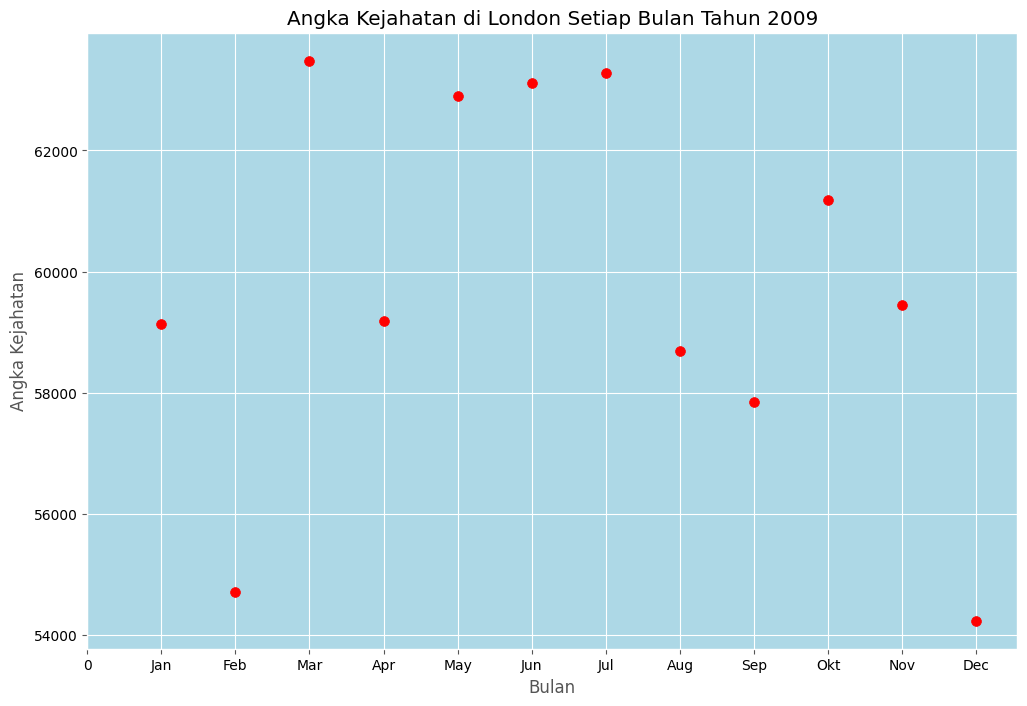

In [24]:
crime2009 = df.loc[df['year'] == 2009]
months = crime2009['month'].unique()
months.sort()

total = crime2009.groupby('month').sum()['value']
name_of_month= [0, 'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Okt','Nov','Dec']
n= np.arange(len(months)+1)
x_range= range(1,13)

plt.figure(figsize=(12,8))
ax= plt.axes()
ax.set_facecolor('lightblue')
plt.scatter(x_range, total, s=50, c='red',cmap='varidis',alpha=1)
plt.title("Angka Kejahatan di London Setiap Bulan Tahun 2009")
plt.xlabel("Bulan")
plt.ylabel("Angka Kejahatan")
plt.xticks(n, name_of_month)
plt.xticks(color='black')
plt.yticks(color='black')
plt.grid(color='white')
plt.show()

Berdasarkan scatter plot yang telah dibuat, kasus kejahatan terendah pada tahun 2009 terjadi pada bulan `Desember` di bawah **56.000** kasus dan kasus kejahatan tertinggi terjadi pada bulan `Maret` di kisaran angka **62.000** ke atas.

### Word Clouds

#### Pertanyaan: `Apa kata-kata kejahatan tingkat minor yang sering muncul dalam kasus kejahatan di London?`

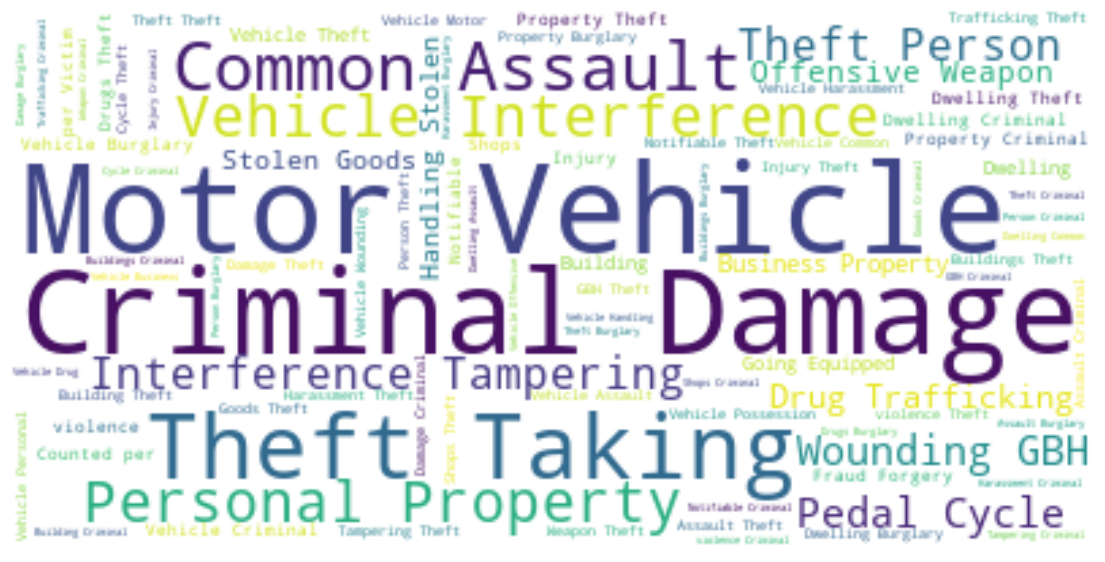

In [25]:
wordClouds = df['minor_category']
stopwords = set(STOPWORDS)
london_wc = WordCloud(background_color='white',stopwords=stopwords)

london_wc.generate(' '.join(wordClouds.values))

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(20) # set height

plt.imshow(london_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Pada visualisasi data Word Clouds kata-kata yang berukuran besar merupakan kejahatan yang paling sering terjadi di London pada periode 2008-2016. Kata-kata tersebut adalah `Criminal Damage, Motor Vehicle, Theft Taking` 

### Folium Maps

#### Mengimplementasikan London Maps Menggunakan `Folium`

In [28]:
london_map = folium.Map(location=[51.489, -0.124], zoom_start=11)

london_map

## Kesimpulan

Berdasarkan data visualisasi yang telah dibuat, maka dapat ditarik kesimpulan sebagai berikut:
- Selama tahun 2008-2016 kasus kejahatan yang paling sering terjadi di London adalah `Theft and Handling` dengan persentase **41.3%** dimana setiap tahunnya menyumbang **250.000** kasus kejahatan
- `Violence Against the Person` merupakan kejahatan kedua yang sering terjadi di London dengan angka kejahatan di atas **100.000** dan mendapatkan persentase **24.2%** 
- Ada **13** wilayah yang memiliki total kasus kejahatan antara ***182.479-227.904*** kasus
- Kasus kejahatan tingkat minor yakni `Assault with Injury` yang terjadi di wilayah Brent mencapai angka tertingginya pada tahun **2009** di kisaran **2.200** kasus
- Wilayah yang memiliki tingkat kriminalitas tertinggi pada tahun 2008-2016 di wilayah London adalah ***Westminster*** di atas **400.000** kasus, sedangkan pada wilayah lain di bawah angka **300.000** kasus
- Jumlah minimum kasus kejahatan di wilayah ***City of London*** adalah **0** dan jumlah maksimum di kisaran angka **180** dan wilayah ini merupakan wilayah yang memiliki tingkat kriminalitas paling rendah di wilayah London
- Pada tahun 2009 kasus kejahatan ***terendah*** terjadi pada bulan Desember di bawah **56.000** kasus dan ***tertinggi*** pada bulan **Maret** di atas **62.000** kasus
- `Criminal Damage, Motor Vehicle, dan Theft Taking` merupakan penyumbang kasus kejahatan terbesar di tingkat minor pada wilayah London periode 2008-2016